In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns

In [2]:
file_path = "C:\\Users\\Kishan D K\\OneDrive\\Documents\\Data_science\\Data_files\\Visadataset.csv"
file_path

'C:\\Users\\Kishan D K\\OneDrive\\Documents\\Data_science\\Data_files\\Visadataset.csv'

In [3]:
pd.read_csv(file_path)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,CASE000001,North Am,Master's,Y,Y,67106,1958,Midwest,37301.639919,Year,N,Denied
1,CASE000002,Africa,Bachelor's,N,Y,8604,1978,South,16595.987276,Year,Y,Denied
2,CASE000003,North Am,Doctorate,N,Y,65892,2004,Midwest,23798.265546,Year,Y,Certified
3,CASE000004,Asia,Master's,Y,N,42916,1957,South,23147.729249,Hour,Y,Certified
4,CASE000005,Asia,Master's,Y,Y,87731,2004,West,40611.953414,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,CASE025476,Europe,High School,N,Y,60678,1969,Northeast,36008.381578,Year,N,Denied
25476,CASE025477,Europe,Bachelor's,Y,N,9687,2004,Midwest,45855.045642,Hour,N,Certified
25477,CASE025478,Europe,Doctorate,Y,N,86477,1976,Midwest,42572.951662,Year,N,Denied
25478,CASE025479,Europe,Master's,Y,Y,87627,1976,West,42016.385579,Year,N,Denied


In [4]:
visa_df = pd.read_csv(file_path)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,CASE000001,North Am,Master's,Y,Y,67106,1958,Midwest,37301.639919,Year,N,Denied
1,CASE000002,Africa,Bachelor's,N,Y,8604,1978,South,16595.987276,Year,Y,Denied
2,CASE000003,North Am,Doctorate,N,Y,65892,2004,Midwest,23798.265546,Year,Y,Certified
3,CASE000004,Asia,Master's,Y,N,42916,1957,South,23147.729249,Hour,Y,Certified
4,CASE000005,Asia,Master's,Y,Y,87731,2004,West,40611.953414,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,CASE025476,Europe,High School,N,Y,60678,1969,Northeast,36008.381578,Year,N,Denied
25476,CASE025477,Europe,Bachelor's,Y,N,9687,2004,Midwest,45855.045642,Hour,N,Certified
25477,CASE025478,Europe,Doctorate,Y,N,86477,1976,Midwest,42572.951662,Year,N,Denied
25478,CASE025479,Europe,Master's,Y,Y,87627,1976,West,42016.385579,Year,N,Denied


$Box-plot$

<img src="https://miro.medium.com/max/9000/1*2c21SkzJMf3frPXPAR_gZA.png" jsaction="" class="sFlh5c FyHeAf iPVvYb" style="max-width: 9000px; height: 152px; margin: 0px; width: 304px;" alt="Understanding Boxplots - KDnuggets" jsname="kn3ccd">

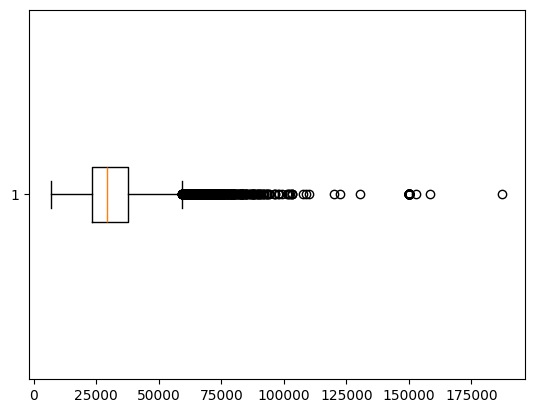

In [11]:
pyplot.boxplot(visa_df['prevailing_wage'],vert=False)
pyplot.show()

$Dealing$-$Outliers$

- Removal of Outliers

- Impute the Outliers with median value
     - because median is not impact by outliers
- Cap the Outlier with Q3, which are having more than Q3

- Cap the Outlier with Q1, which are less than Q1

In [14]:
# step1 calculate Q1,Q2,Q3
q1 = np.quantile(visa_df['prevailing_wage'],0.25)
q2 = np.quantile(visa_df['prevailing_wage'],0.50)
q3 = np.quantile(visa_df['prevailing_wage'],0.75)

# step2 claculate IQR (Formula is Q3-Q1)
IQR = q3-q1

#step3 UB = Q3+1.5*IQR
UB = q3+1.5*IQR

# step4 LB = Q1-1.5*IQR
LB = q1-1.5*IQR

#step5 cond1 = col>UB
#step6 cond2 = col<LB
cond1 = visa_df['prevailing_wage']>UB
cond2 = visa_df['prevailing_wage']<LB

# step7 cond1|cond2
# step8 col[cond1|cond2]
Outliers = visa_df['prevailing_wage'][cond1|cond2]

# series into array of values by applying .values
Outliers_data = Outliers.values
Outliers_data

array([150000.        ,  62438.83682626,  70306.25387561,  93963.03938494,
       150000.        ,  77702.34581744,  79388.31280163,  63398.89300609,
        83394.9195164 ,  65274.14942759,  63315.39120725,  59912.10477816,
        84946.94055233,  63678.03013914,  68713.183126  ,  69034.43014941,
       150000.        ,  63326.26144694,  71778.8195334 ,  59544.57746036,
        83415.54780146, 150000.        ,  69663.0470603 ,  66373.76385324,
       150000.        ,  87882.84375568,  67493.72879849,  60138.03261361,
        62071.01241984,  65524.30218227,  71775.33526149,  87537.44956447,
        67721.5875485 ,  62806.03095523,  61883.90158355, 150000.        ,
        62265.78299019,  73568.5169706 ,  65210.44226325,  88765.57745452,
        62007.89227211,  66585.50990307,  89706.25182721,  86929.54812024,
        63340.30965485,  62220.00635109,  63124.61288895,  62212.46295819,
        79014.66053929,  63238.99273556,  81222.53988685,  62418.50276553,
        69127.1040444 ,  

**Find the Outliers**
- Formula
- Q3+1.5*IQR>  and   Q1-1.5*IQR

- step1 calculate Q1,Q2,Q3
- step2 claculate IQR (Formula is Q3-Q1)
- step3 UB =  Q3+1.5*IQR
- step4 LB =  Q1-1.5*IQR
- step5 cond1 = col>UB
- step6 cond2 = col<LB
- step7 cond1|cond2
- step8 col[cond1|cond2]

In [17]:
len(Outliers_data)

761

In [19]:
# By using function for Outliers Data
def outliers():
    q1 = np.quantile(visa_df['prevailing_wage'],0.25)
    q2 = np.quantile(visa_df['prevailing_wage'],0.50)
    q3 = np.quantile(visa_df['prevailing_wage'],0.75)
    # step2 claculate IQR (Formula is Q3-Q1)
    IQR = q3-q1
    UB = q3+1.5*IQR
    LB = q1-1.5*IQR
    cond1 = visa_df['prevailing_wage']>UB
    cond2 = visa_df['prevailing_wage']<LB
    ##################################################
    Outliers = visa_df['prevailing_wage'][cond1|cond2]   # this line is very important, we need to specify the column
    ##################################################
    Outliers_data = Outliers.values
    return(Outliers_data)
Outliers_data = outliers()
len(Outliers_data)
    

761

In [21]:
len(Outliers_data) 

761

In [23]:
len(visa_df)  

25480

In [25]:
len(Outliers_data)*100/len(visa_df)   # This is the percentage of Outliers 

2.986656200941915

$Case_1$
- We have 761 Outlier from the previaling_wage
- Removal of Outliers in prevailing_wage column (ie: 761 rows) from entire data frame

In [28]:
# Non_Outliers Data

q1 = np.quantile(visa_df['prevailing_wage'],0.25)
q2 = np.quantile(visa_df['prevailing_wage'],0.50)
q3 = np.quantile(visa_df['prevailing_wage'],0.75)
# step2 claculate IQR (Formula is Q3-Q1)
IQR = q3-q1
UB = q3+1.5*IQR
LB = q1-1.5*IQR
cond1 = visa_df['prevailing_wage']<UB
cond2 = visa_df['prevailing_wage']>LB
##################################################
Non_Outliers_df = visa_df[cond1&cond2]  
##################################################
Non_Outliers_df
len(Non_Outliers_df)

24719

In [30]:
#                 Total_data  minus  Non_Outliers 
Outliers_count = len(visa_df)-len(Non_Outliers_df)
"Outliers count is {}".format(Outliers_count)

'Outliers count is 761'

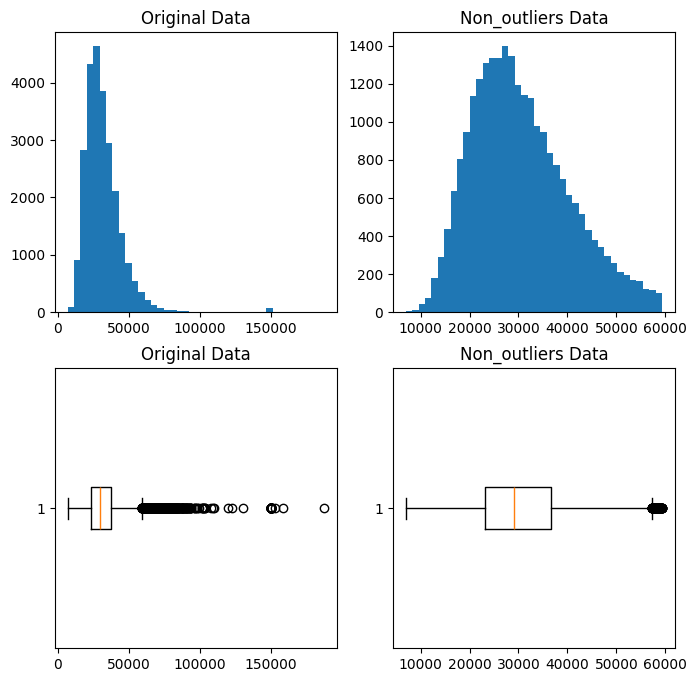

In [32]:
pyplot.figure(figsize = (8,8))     # we are setting a figure
pyplot.subplot(2,2,1)              # In subplot 2,2 means 2*2 = 4 (ploting 4 images),  1 means index of that image1..2...3....4...
pyplot.title('Original Data')
pyplot.hist(visa_df['prevailing_wage'],bins = 40)

pyplot.subplot(2,2,2)
pyplot.title('Non_outliers Data')
pyplot.hist(Non_Outliers_df['prevailing_wage'],bins = 40)

pyplot.subplot(2,2,3)
pyplot.title('Original Data')
pyplot.boxplot(visa_df['prevailing_wage'],vert = False)   # After removal of Outliers

pyplot.subplot(2,2,4)
pyplot.title('Non_outliers Data')
pyplot.boxplot(Non_Outliers_df['prevailing_wage'],vert = False)   # After removal of Outliers

pyplot.show()

$Case-2$
- Impute the Outliers with median value
- we got prevailing_wage as 761 Outliers
- Replace those 761 Outliers with median value of prevailing_wage

In [35]:
UB,LB

(59349.40908021803, 1654.052057332523)

In [37]:
# iterate through prevailing_wages as i
# if any value >UB or <LB =====> median
# else: i 
new_value = []
for i in visa_df['prevailing_wage']:
    if i>UB or i<LB:
        new_value.append(visa_df['prevailing_wage'].median)
    else:
        new_value.append(i)
new_value

[37301.63991939709,
 16595.98727588045,
 23798.265546046838,
 23147.729248687017,
 40611.953414262505,
 35166.255508958515,
 29618.815166316537,
 44678.67057049707,
 45638.507385296034,
 32286.256254522235,
 32350.66487337539,
 30503.114500651656,
 33251.75067857069,
 33257.45141871304,
 53945.46824351131,
 18538.2631264844,
 34177.02617733082,
 34967.49213756778,
 25691.223070110154,
 43689.2565730556,
 27302.10830865315,
 18024.825490436444,
 29166.755494797697,
 51332.96054381471,
 15644.437314891062,
 21559.567230372115,
 41266.56730688504,
 22653.79118360744,
 42672.599947079216,
 30157.30448222548,
 <bound method Series.median of 0        37301.639919
 1        16595.987276
 2        23798.265546
 3        23147.729249
 4        40611.953414
              ...     
 25475    36008.381578
 25476    45855.045642
 25477    42572.951662
 25478    42016.385579
 25479    25495.250664
 Name: prevailing_wage, Length: 25480, dtype: float64>,
 21031.01272308663,
 18821.996094788377,
 29551.

In [39]:
len(new_value)

25480

In [41]:
# we are itreate through prevailing_wage data
# if any data point >UB or <LB means it is a Outlier so in that position we are keeping median value of the column
# Otherwise we are keeping the same value

$np.where$

In [44]:
dict1 = {'col1':[1,2,3,4],
    'col2':['A','B','C','D']}
data = pd.DataFrame(dict1)
data
# I want to impute a value 100 in column 1
# where values greater than 2
#o/p like this
# col1     col2
#   1        A
#   2        B
#   100      c
#   100      D

,col1,col2
0,1,A
1,2,B
2,3,C
3,4,D


- np.where will takes Three argument values
- Condition : cond = data['col1']>2
- If that condition is True will provide the value : 100
- If condition is False will keep the same value : data['col1']

- Syntax
- np.where(<condition>,<True_value>,<False_value>)

In [63]:
cond = data['col1']>2     # it is only for if else or True, False,  # not for multiple if else conditions
np.where(cond,100,data['col1'])

array([  1,   2, 100, 100], dtype=int64)

In [70]:
data

,col1,col2
0,1,A
1,2,B
2,3,C
3,4,D


$Case-1$
- Create a new column

In [74]:
data['new_col']=[100,200,300,400]
data

,col1,col2,new_col
0,1,A,100
1,2,B,200
2,3,C,300
3,4,D,400


In [80]:
cond = data['col1']>2  
data['col3']=np.where(cond,100,data['col1'])
data

,col1,col2,new_col,col3
0,1,A,100,1
1,2,B,200,2
2,3,C,300,100
3,4,D,400,100


$Case-2$
- Overwrite

In [82]:
# To replace instead of creating new col[ie: col3]
cond = data['col1']>2  
data['col1']=np.where(cond,100,data['col1'])
data

,col1,col2,new_col,col3
0,1,A,100,1
1,2,B,200,2
2,100,C,300,100
3,100,D,400,100


In [120]:
data['new_col']=[100,200,300,400]
data

,col1,col2,new_col
0,1,A,100
1,2,B,200
2,100,C,300
3,100,D,400


In [122]:
data['col3']=np.where(cond,100,data['col1'])
data

,col1,col2,new_col,col3
0,1,A,100,1
1,2,B,200,2
2,100,C,300,100
3,100,D,400,100


In [124]:
# removing of unwanted column
data.drop(['new_col','col3'],axis=1, inplace=True) # axis means, it is to specify what to remove column[1] or Row[0]
data

,col1,col2
0,1,A
1,2,B
2,100,C
3,100,D


$TASK$
- **Implement the same thing for prevailing_wage**

In [130]:
# Replace
# so know condition data should be prevailing_wage
# True value should be median


In [159]:
#step1 : Write the condition
#step2 : True value: median value
#step3 : False value: same column values
#step4 : Implement np.where(<cond>,<True_value>,<False_value>)
#step5 : Overwrite in the same column name
#step6 : Draw the box_plot for P_wage
#step7 : Draw the hist for P_wage

cond1 = visa_df['prevailing_wage']>UB
cond2 = visa_df['prevailing_wage']<LB
wage_median = visa_df['prevailing_wage'].median()
cond = cond1|cond2 
visa_df['prevailing_wage']= np.where(cond,wage_median,visa_df['prevailing_wage'])
visa_df['prevailing_wage']

0        37301.639919
1        16595.987276
2        23798.265546
3        23147.729249
4        40611.953414
             ...     
25475    36008.381578
25476    45855.045642
25477    42572.951662
25478    42016.385579
25479    25495.250664
Name: prevailing_wage, Length: 25480, dtype: float64

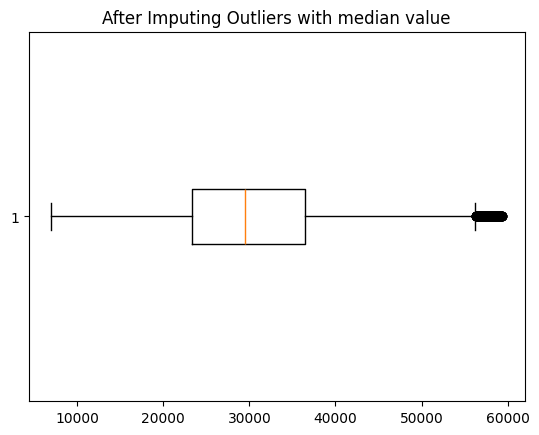

In [171]:
pyplot.title('After Imputing Outliers with median value')
pyplot.boxplot(visa_df['prevailing_wage'],vert = False)
pyplot.show()

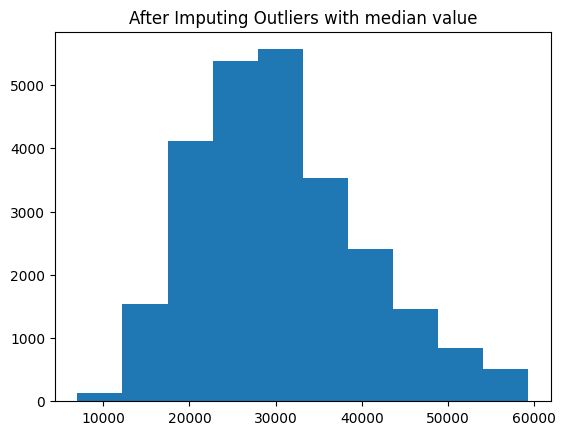

In [173]:
pyplot.title('After Imputing Outliers with median value')
pyplot.hist(visa_df['prevailing_wage'])
pyplot.show()